# Demostración Completa de la Librería ctg_viz

Este notebook demuestra todas las funcionalidades de la librería `ctg_viz` para análisis y visualización de datos de Cardiotocografía (CTG).

## Contenido
1. **Carga de Datos** - Módulo `utils`
2. **Análisis de Completitud** - Módulos `utils` y `categorization`
3. **Preprocesamiento** - Módulo `preprocessing`
4. **Visualizaciones** - Módulo `plots`
   - Histogramas
   - Gráficos de Violín
   - Series de Tiempo
   - Diagramas de Dispersión
   - Mapas de Calor
   - Gráficos de Barras
   - Boxplots
   - Distribuciones
   - Densidad

## 1. Importar Librerías y Configuración Inicial

In [1]:
# Importar librerías estándar
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importar módulos de ctg_viz
from ctg_viz.utils import load_data, check_data_completeness
from ctg_viz.categorization import check_data_completeness_Arellano_Ortiz_Andre
from ctg_viz.preprocessing import process_data

# Importar funciones de visualización
from ctg_viz.plots import (
    plot_histogram_lb_by_nsp,
    plot_violin_with_swarm,
    plot_line_lb_evolution,
    plot_scatter_lb_astv,
    plot_correlation_heatmap,
    plot_bar_class_counts,
    plot_boxplot_astv_by_nsp,
    plot_violin_with_swarm,
    plot_density_width_by_nsp
)

print('Todas las librerías han sido importadas correctamente')

Todas las librerías han sido importadas correctamente


## 2. Carga de Datos

Utilizamos la función `load_data()` del módulo `utils` para cargar el dataset CTG.

In [2]:
# Cargar datos usando ctg_viz.utils
df = load_data('data/CTG.csv')

print(f'Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas')
print('\nPrimeras 5 filas:')
df.head()

Dataset cargado: 2129 filas, 40 columnas

Primeras 5 filas:


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


## 3. Análisis de Completitud de Datos

### 3.1 Usando `check_data_completeness` (utils)

In [3]:
# Analisis de completitud con la funcion del modulo utils
completeness_report = check_data_completeness(df)

print('Reporte de Completitud de Datos (utils.check_data_completeness):')
completeness_report

Reporte de Completitud de Datos (utils.check_data_completeness):


,Columna,Nulos,% Completitud,Tipo Dato,Valores Únicos,Std Dev,Varianza,Clasificación
0,FileName,3,99.86,object,352,NaN,NaN,Categórica
1,Date,3,99.86,object,48,NaN,NaN,Categórica
2,SegFile,3,99.86,object,2126,NaN,NaN,Categórica
3,b,3,99.86,float64,979,894.08,799387.54,Continua
4,e,3,99.86,float64,1064,930.92,866610.45,Continua
5,LBE,3,99.86,float64,48,9.84,96.84,Continua
6,LB,3,99.86,float64,48,9.84,96.84,Continua
7,AC,3,99.86,float64,22,3.56,12.68,Continua
8,FM,2,99.91,float64,96,39.03,1523.38,Continua
9,UC,2,99.91,float64,19,2.88,8.28,Continua


### 3.2 Usando `check_data_completeness_Arellano_Ortiz_Andre` (categorization)

In [4]:
# Analisis de completitud con la funcion del módulo categorization
completeness_report_custom = check_data_completeness_Arellano_Ortiz_Andre(df)

print('Reporte de Completitud de Datos (categorization.check_data_completeness_Arellano_Ortiz_Andre):')
completeness_report_custom

Reporte de Completitud de Datos (categorization.check_data_completeness_Arellano_Ortiz_Andre):


,Columna,Nulos,% Completitud,Tipo Dato,Valores Únicos,Std Dev,Varianza,Clasificación
0,FileName,3,99.86,object,352,NaN,NaN,Categórica
1,Date,3,99.86,object,48,NaN,NaN,Categórica
2,SegFile,3,99.86,object,2126,NaN,NaN,Categórica
3,b,3,99.86,float64,979,894.08,799387.54,Continua
4,e,3,99.86,float64,1064,930.92,866610.45,Continua
5,LBE,3,99.86,float64,48,9.84,96.84,Continua
6,LB,3,99.86,float64,48,9.84,96.84,Continua
7,AC,3,99.86,float64,22,3.56,12.68,Continua
8,FM,2,99.91,float64,96,39.03,1523.38,Continua
9,UC,2,99.91,float64,19,2.88,8.28,Continua


## 4. Preprocesamiento de Datos

Utilizamos `process_data()` para:
- Eliminar columnas con >20% de valores nulos
- Imputar valores faltantes (mediana para numéricos, moda para categóricos)
- Tratar outliers usando el método IQR

In [5]:
# Preprocesar datos
df_processed = process_data(df)

print(f'\nDatos procesados: {df_processed.shape[0]} filas, {df_processed.shape[1]} columnas')
print(f'Valores nulos restantes: {df_processed.isnull().sum().sum()}')

# Verificar que no hay nulos
df_processed.isnull().sum()

No hay columnas con >20% de nulos para eliminar.

Datos procesados: 2129 filas, 40 columnas
Valores nulos restantes: 0


FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

## 5. Visualizaciones

A continuación demostramos todas las funciones de visualización disponibles en `ctg_viz.plots`.

### 5.1 Histograma - Distribución de LB por NSP

Función: `plot_histogram_lb_by_nsp()`

In [6]:
# Histograma usando Altair
chart_histogram = plot_histogram_lb_by_nsp(df_processed)
chart_histogram

alt.Chart(...)

### 5.2 Gráfico de Violín con Swarm

Función: `plot_violin_with_swarm()`

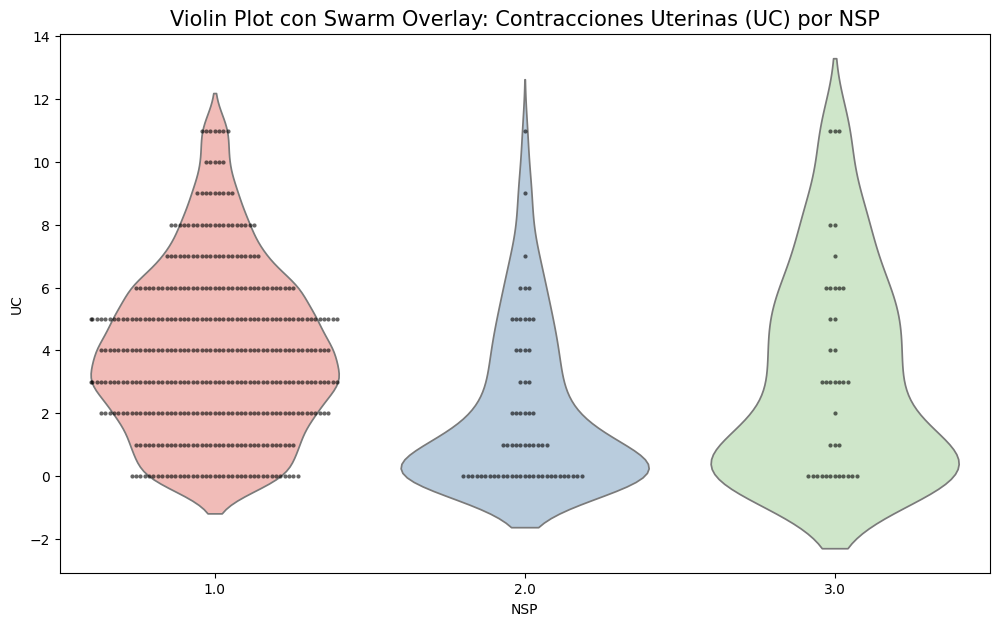

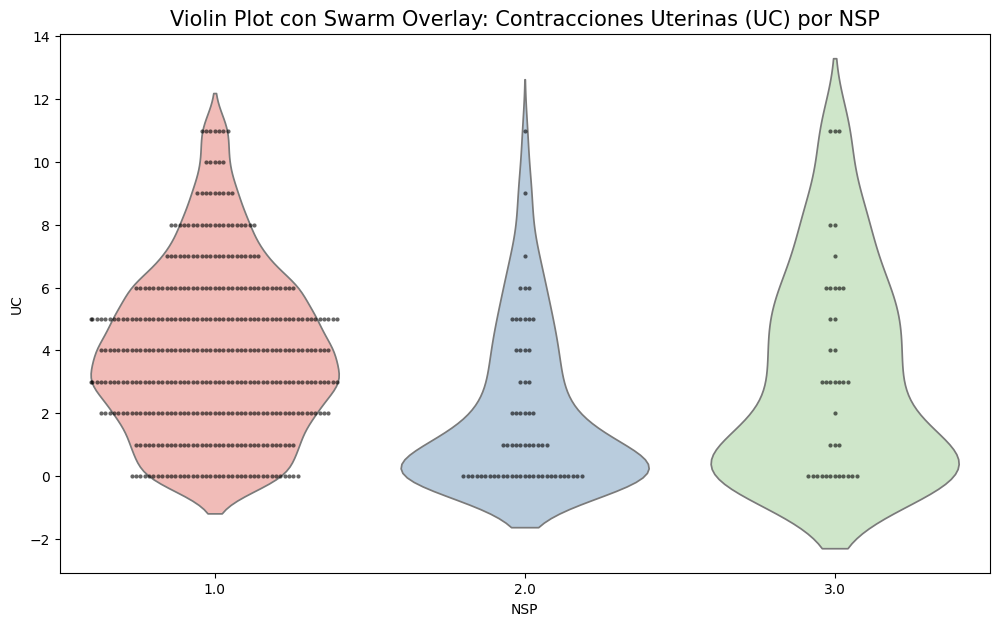

In [7]:
# Gráfico de violin con puntos
fig_violin = plot_violin_with_swarm(df_processed)
fig_violin

### 5.3 Serie de Tiempo - Evolución de LB

Función: `plot_line_lb_evolution()`

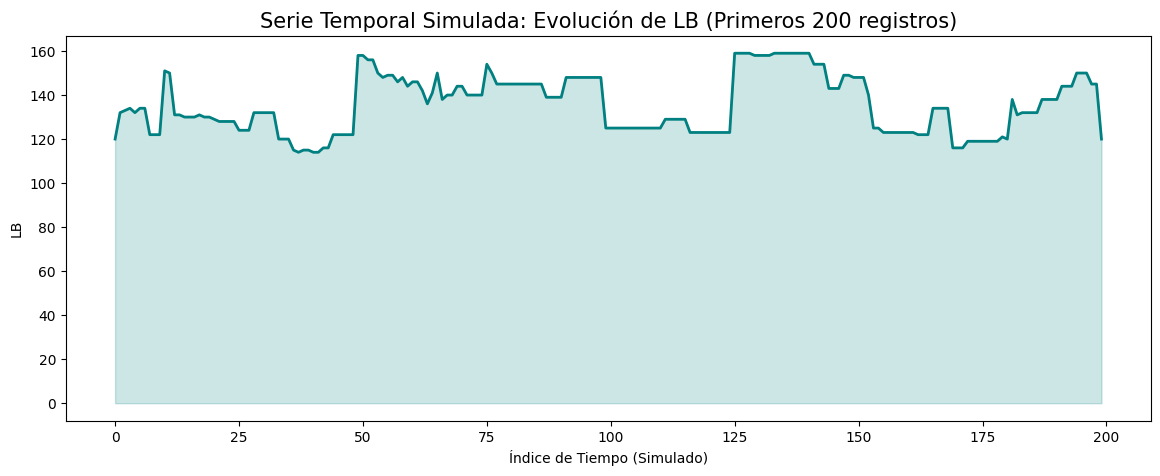

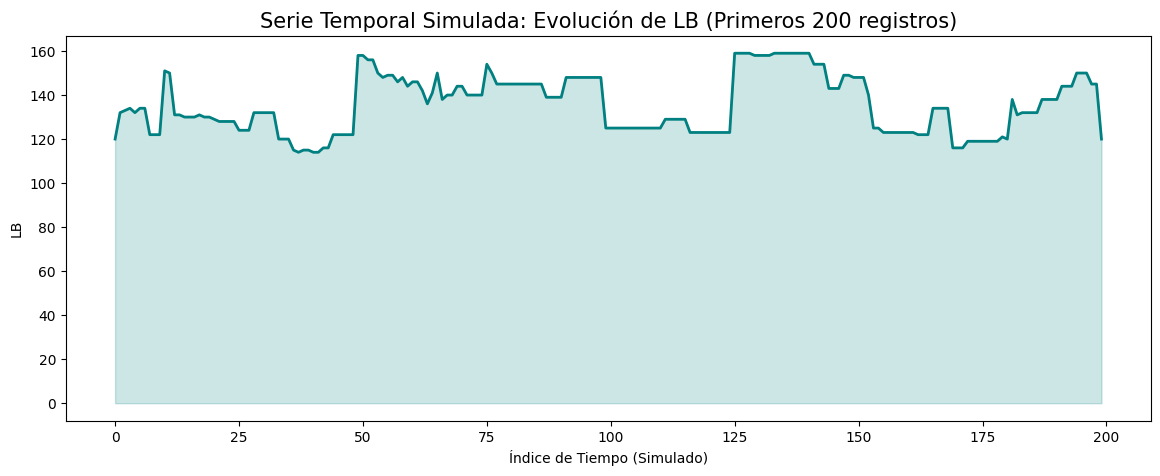

In [8]:
# Serie de tiempo
chart_timeseries = plot_line_lb_evolution(df_processed)
chart_timeseries

### 5.4 Diagrama de Dispersión - LB vs ASTV

Función: `plot_scatter_lb_astv()`

In [9]:
# Diagrama de dispersión
fig_scatter = plot_scatter_lb_astv(df_processed)
fig_scatter.show()

alt.Chart(...)

### 5.5 Mapa de Calor - Correlaciones

Función: `plot_correlation_heatmap()`

In [10]:
# Seleccionar variables numericas para correlacion
numeric_vars = ['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV']

# Mapa de calor de correlaciones
chart_heatmap = plot_correlation_heatmap(df_processed, numeric_vars)
chart_heatmap

alt.Chart(...)

### 5.6 Gráfico de Barras - Conteo de Clases

Función: `plot_bar_class_counts()`

In [11]:
# Grafico de barras horizontal
fig_bar = plot_bar_class_counts(df_processed)
fig_bar.show()

### 5.7 Boxplot - ASTV por NSP

Función: `plot_boxplot_astv_by_nsp()`

In [12]:
# Boxplot usando Plotly
fig_boxplot = plot_boxplot_astv_by_nsp(df_processed)
fig_boxplot.show()

### 5.8 Distribución - UC por NSP

Función: `plot_violin_with_swarm()`

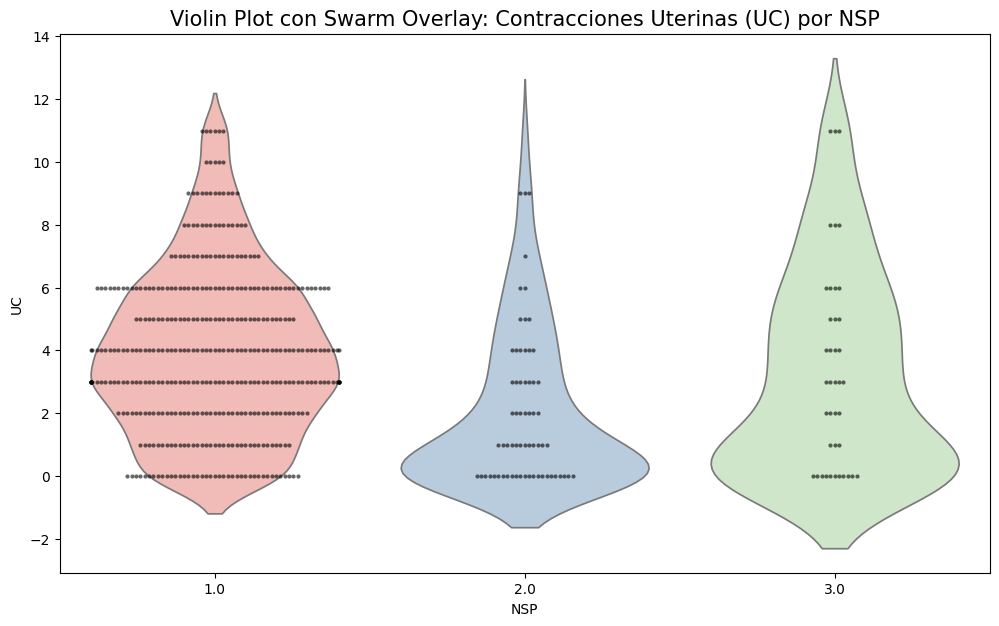

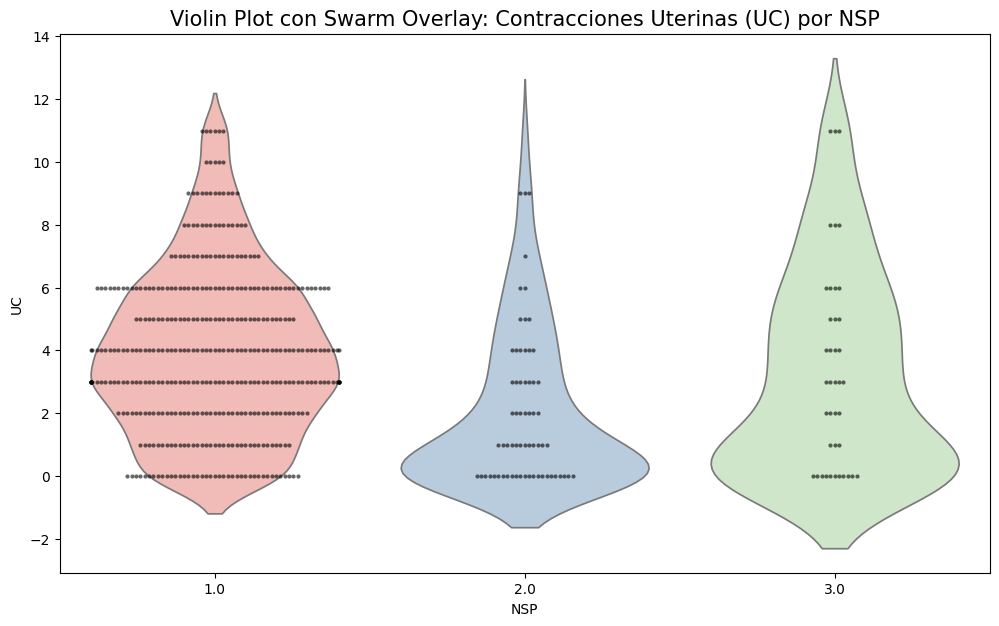

In [13]:
# Grafico de violin para UC
chart_distribution = plot_violin_with_swarm(df_processed)
chart_distribution

### 5.9 Densidad - Width por NSP

Función: `plot_density_width_by_nsp()`

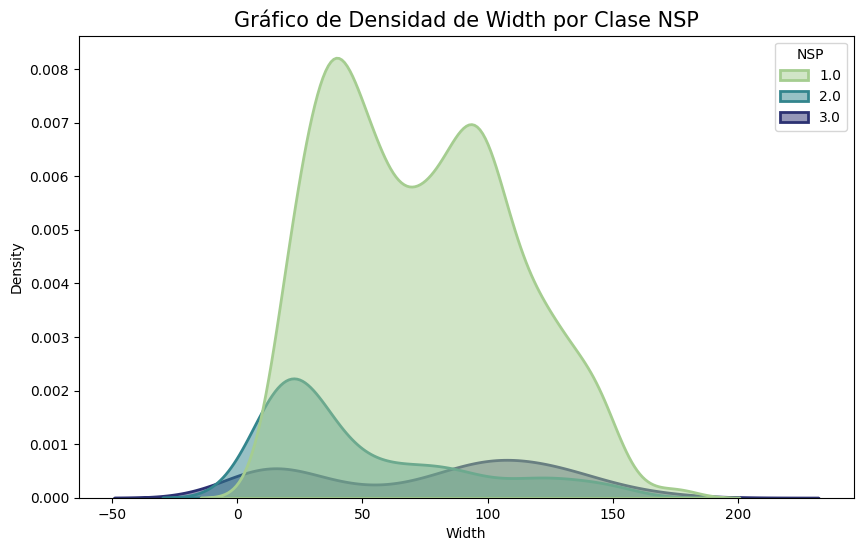

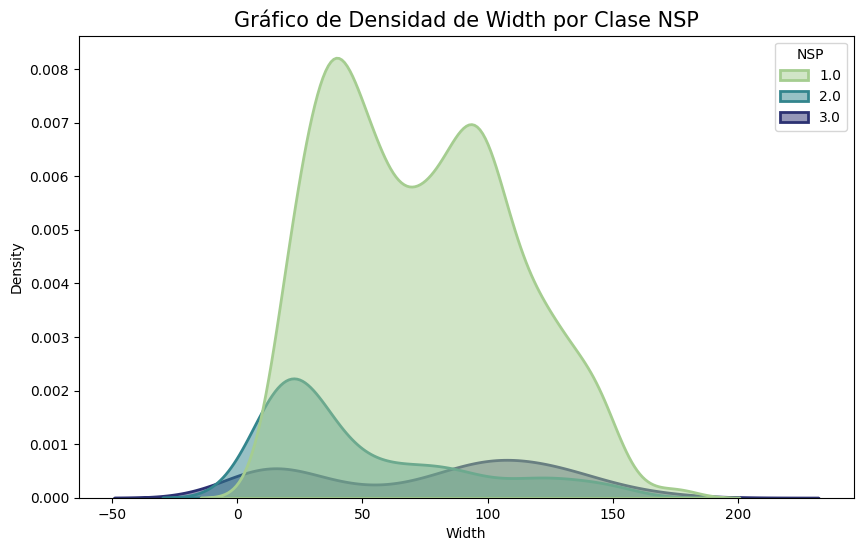

In [14]:
# Grafico de densidad
chart_density = plot_density_width_by_nsp(df_processed)
chart_density